# Optymalizacja

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy


Celem tego ćwiczenia jest porównanie wydajność różnych metod optymalizacji dostępnych w Pythonie. 

**Zadanie 1.**

Do tego rodzaju testów często wykorzystuje się funkcję Rosenbrocka:
$$
f(\mathbf{x})=\sum_{i=1}^{N-1}\left[100\left(x_{i+1}-x_i^2\right)^2+\left(1-x_i\right)^2\right] \quad \text { gdzie } \quad \mathbf{x}=\left(x_1, \ldots, x_N\right) \in \mathbb{R}^N
$$

W przypadku dwóch zmienny funkcja sprowadza się do postaci:
$$f(x, y)=(1-x)^2+100\left(y-x^2\right)^2$$

Zaimplementuj trójwymiarową (dwie zmienne) funkcję Rosenbrocka i przedstaw ją na wykresie (na osiach x i y zastosuj wartości z przedziału $[-10,10]$). 

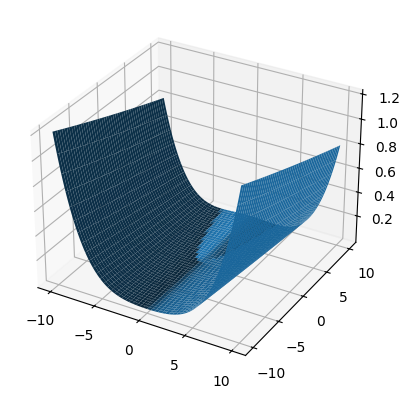

In [2]:
f = lambda x,y: (x-1)**2 + 100*(y-(x**2))**2
plt.figure()
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)
xx,yy = np.meshgrid(x,y)
z = f(xx,yy)
ax = plt.axes(projection='3d')
ax.plot_surface(xx,yy,z)

plt.show()


**Zadanie 2.**

Inną popularną funkcją jest funkcja rastrigin
$$ f(\mathbf{x})=A n+\sum_{i=1}^n\left[x_i^2-A \cos \left(2 \pi x_i\right)\right]$$
gdzie $A=10$ oraz $x_i \in[-5.12,5.12]$

Zaimplementuj jej trójwymiarową (dwie zmienne) wersję i przedstaw ją na wykresie (na osiach x i y zastosuj wartości z przedziału $[-5.12,5.12]$). 

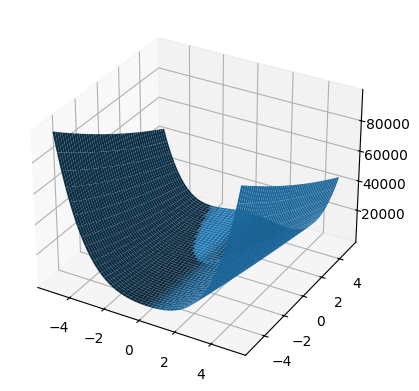

In [3]:
r = lambda x,y: (x**2 - 10 * np.cos(2 * np.pi * x)) + y**2 - 10 * np.cos(2 * np.pi *y) + 20
plt.figure
x = np.linspace(-5.12, 5.12, 1000)
y = np.linspace(-5.12, 5.12, 1000)
xx,yy = np.meshgrid(x,y)
z = f(xx,yy)
ax = plt.axes(projection='3d')
ax.plot_surface(xx,yy,z)

plt.show()


**Zadanie 3**

Gdzie znajdują się minima lokalne i globalne powyższych funkcji?

**Zadanie 4.**

Zapoznaj się z dokumentacją modułu `optimize` z pakietu scipy i spróbuj znaleźć minima powyższych funkcji za pomocą kilku dostępnych w tym pakiecie metod (rozważ różne opcje funkcji `minimize` lub inne funkcje). Która z nich działa najszybciej (jeżeli jest taka możliwość, porównaj liczby iteracji lub czas działania)? Która daje dobre wyniki? Czy któraś z funkcji nie znajduje minimum? Zbadaj znaczenie parametrów.

In [4]:
import numpy as np
from scipy.optimize import minimize
import time

# Definiowanie funkcji do minimalizacji
def func1(x):
    return (x - 2) ** 2 + 1

def func2(x):
    return np.sin(x) + x**2

def func3(x):
    return np.cos(x) * x

# Lista funkcji
functions = [func1, func2, func3]

# Początkowy punkt startowy
initial_guess = [0]

# Metody do przetestowania
methods = ['Nelder-Mead', 'BFGS', 'Powell', 'CG', 'L-BFGS-B']

# Przechowywanie wyników
results = {}

# Testowanie każdej funkcji z każdą metodą
for func in functions:
    func_name = func.__name__
    results[func_name] = {}
    for method in methods:
        start_time = time.time()
        res = minimize(func, initial_guess, method=method)
        end_time = time.time()
        
        # Przechowywanie wyników
        results[func_name][method] = {
            'minimum': res.fun,
            'x': res.x,
            'iterations': res.nit if 'nit' in res else 'N/A',
            'time': end_time - start_time
        }

# Wyświetlanie wyników
for func_name, methods_results in results.items():
    print(f"Results for {func_name}:")
    for method, result in methods_results.items():
        print(f"  Method: {method}")
        print(f"    Minimum value: {result['minimum']}")
        print(f"    Location of minimum: {result['x']}")
        print(f"    Iterations: {result['iterations']}")
        print(f"    Time taken: {result['time']} seconds\n")


Results for func1:
  Method: Nelder-Mead
    Minimum value: 1.0
    Location of minimum: [2.]
    Iterations: 27
    Time taken: 0.010359525680541992 seconds

  Method: BFGS
    Minimum value: 1.0000000000000007
    Location of minimum: [1.99999997]
    Iterations: 2
    Time taken: 0.0050127506256103516 seconds

  Method: Powell
    Minimum value: 1.0
    Location of minimum: [2.]
    Iterations: 2
    Time taken: 0.002002716064453125 seconds

  Method: CG
    Minimum value: 1.0000000000000007
    Location of minimum: [1.99999997]
    Iterations: 1
    Time taken: 0.0 seconds

  Method: L-BFGS-B
    Minimum value: 1.0000000000000002
    Location of minimum: [2.00000001]
    Iterations: 2
    Time taken: 0.07973027229309082 seconds

Results for func2:
  Method: Nelder-Mead
    Minimum value: -0.2324655751398036
    Location of minimum: [-0.4501875]
    Iterations: 23
    Time taken: 0.0010030269622802734 seconds

  Method: BFGS
    Minimum value: -0.23246557515494376
    Location of mi